# RESULTADOS
# N° 1 : EMG
## Filtrado para biceps en contrafuerza

Frecuencia de muestreo: 1000.0 Hz


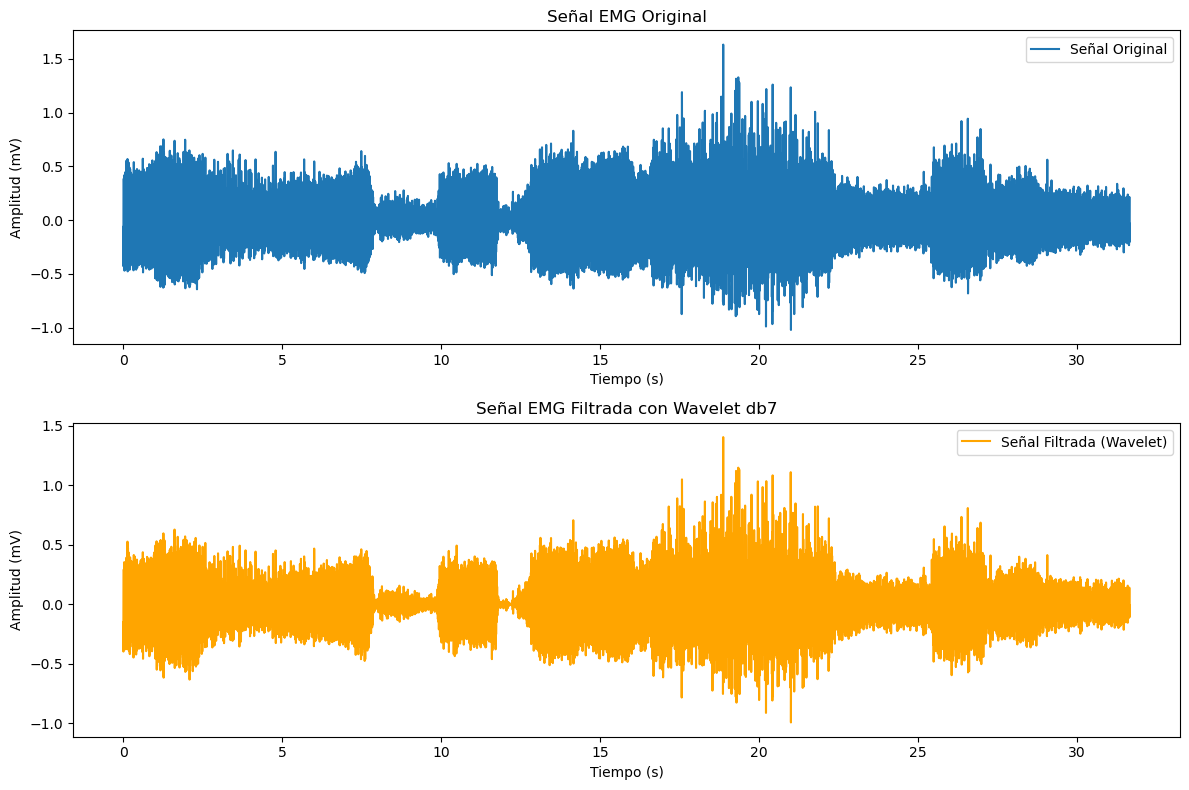

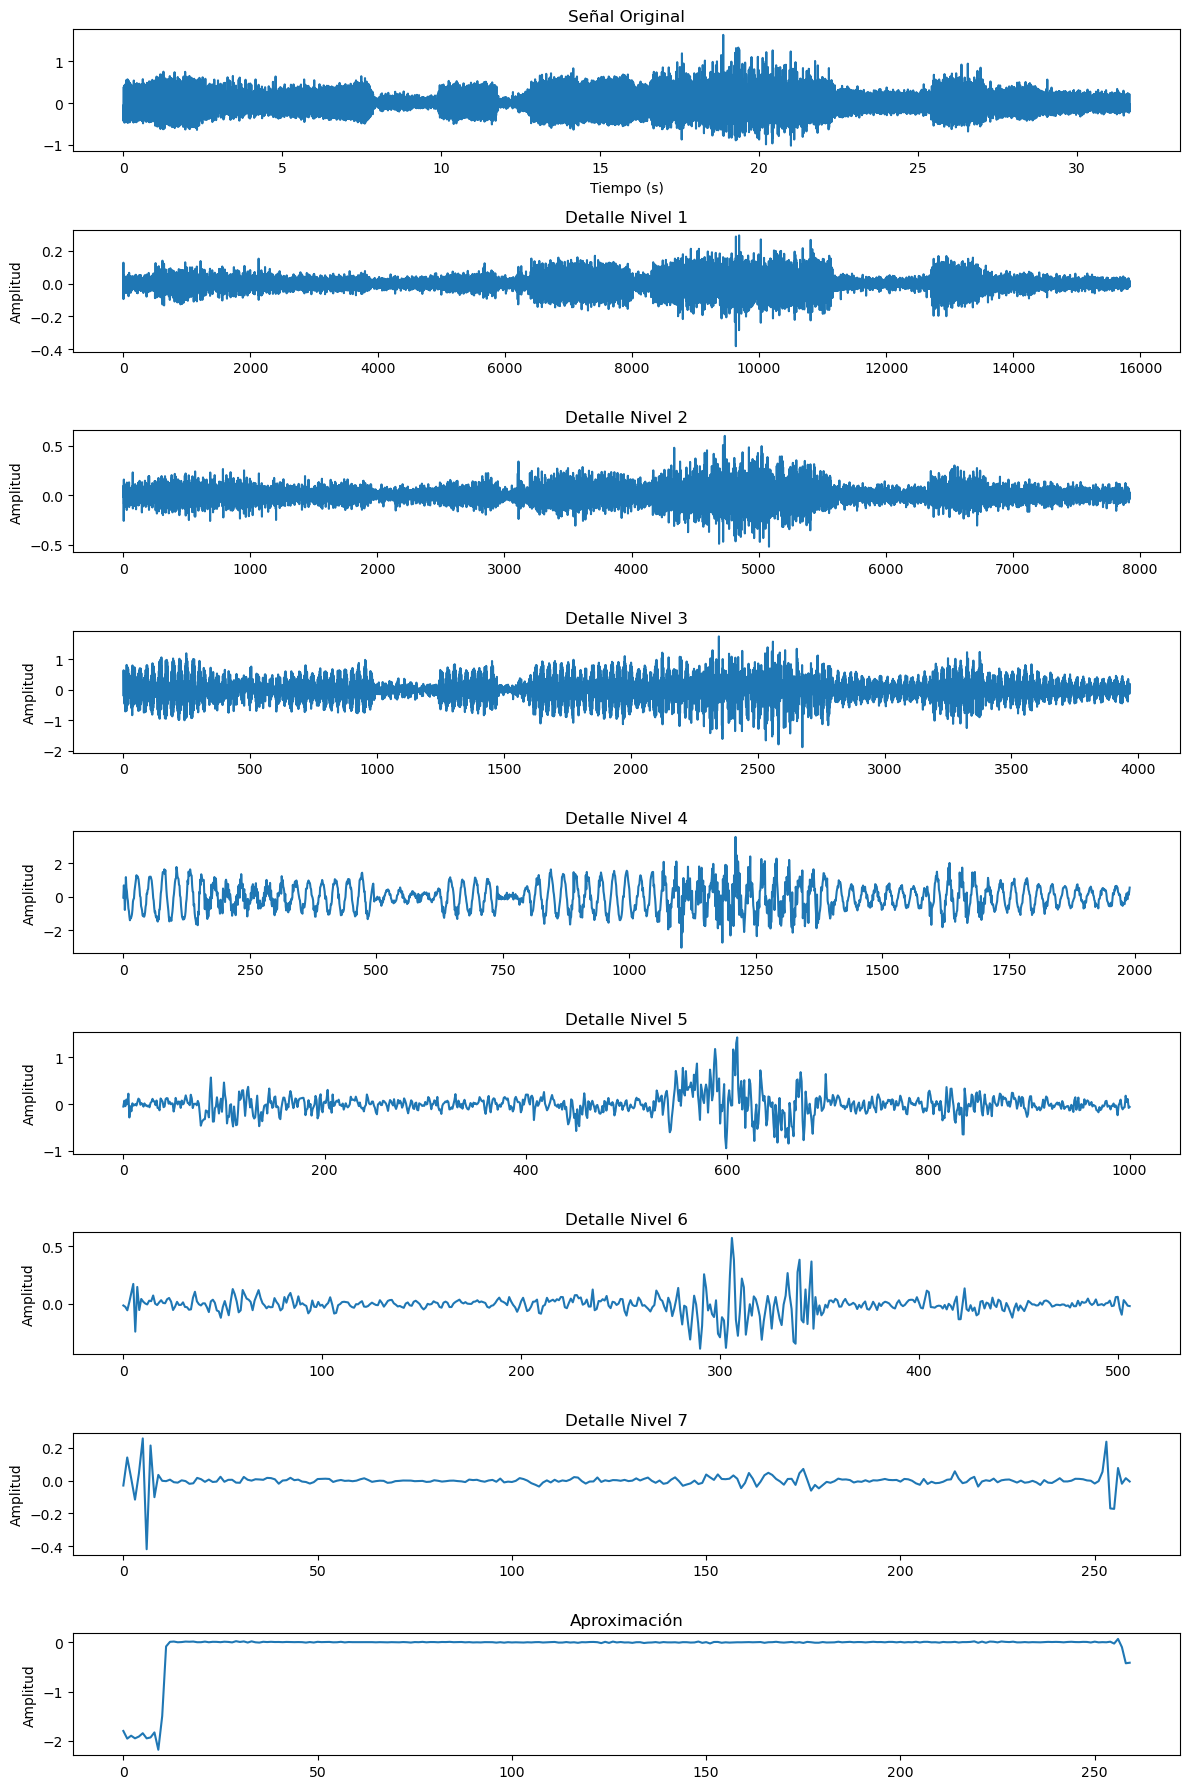

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import re

# 1. Cargar el archivo de señal EMG
ruta_archivo = "C:/Users/DAVID/Desktop/INTRO A SEÑALES/lab 7/biceps contrafuerza 1 (1).txt"

# Leo el archivo y extraer la frecuencia de muestreo
with open(ruta_archivo, "r") as f:
    lineas = f.readlines()
    raw_data = lineas[1]
    x = re.findall(r"[0-9]{3,4}", raw_data)[0]
    Fs = float(x)
    Ts = 1/Fs

print(f"Frecuencia de muestreo: {Fs} Hz")

# Leer los datos, saltando las primeras 3 filas
datos = np.genfromtxt(ruta_archivo, delimiter="\t", skip_header=3)

y = datos[:, -2]
bits = 10
volt_range = 3.28 
y = (y * volt_range/(2**bits - 1))  
y = y - np.mean(y) 

t = np.arange(0, len(y)*Ts, Ts)

# 2. Descomposición Wavelet Daubechies
wavelet = 'db7'  
niveles = 7     

# Descomposición
coeffs = pywt.wavedec(y, wavelet, level=niveles)

# 3. Filtrado
umbral = 0.1  # Ajusta según el ruido de tu señal
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstrucción de la señal filtrada
y_denoised = pywt.waverec(coeffs_umbral, wavelet)

# 4. Ploteo de resultados

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:len(y_denoised)], y_denoised, label='Señal Filtrada (Wavelet)', color='orange')
plt.title(f'Señal EMG Filtrada con Wavelet {wavelet}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()
plt.tight_layout()
plt.show()

# 5. Ploteo de coeficientes de detalle y aproximación
plt.figure(figsize=(12, 2*(niveles+2)))
plt.subplot(niveles+2, 1, 1)
plt.plot(t, y)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')

for i in range(1, niveles+1):
    plt.subplot(niveles+2, 1, i+1)
    plt.plot(coeffs[niveles-i+1])
    plt.title(f'Detalle Nivel {i}')
    plt.ylabel('Amplitud')

plt.subplot(niveles+2, 1, niveles+2)
plt.plot(coeffs[0])
plt.title('Aproximación')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

## Filtrado para movimiento de cara

Frecuencia de muestreo: 1000.0 Hz


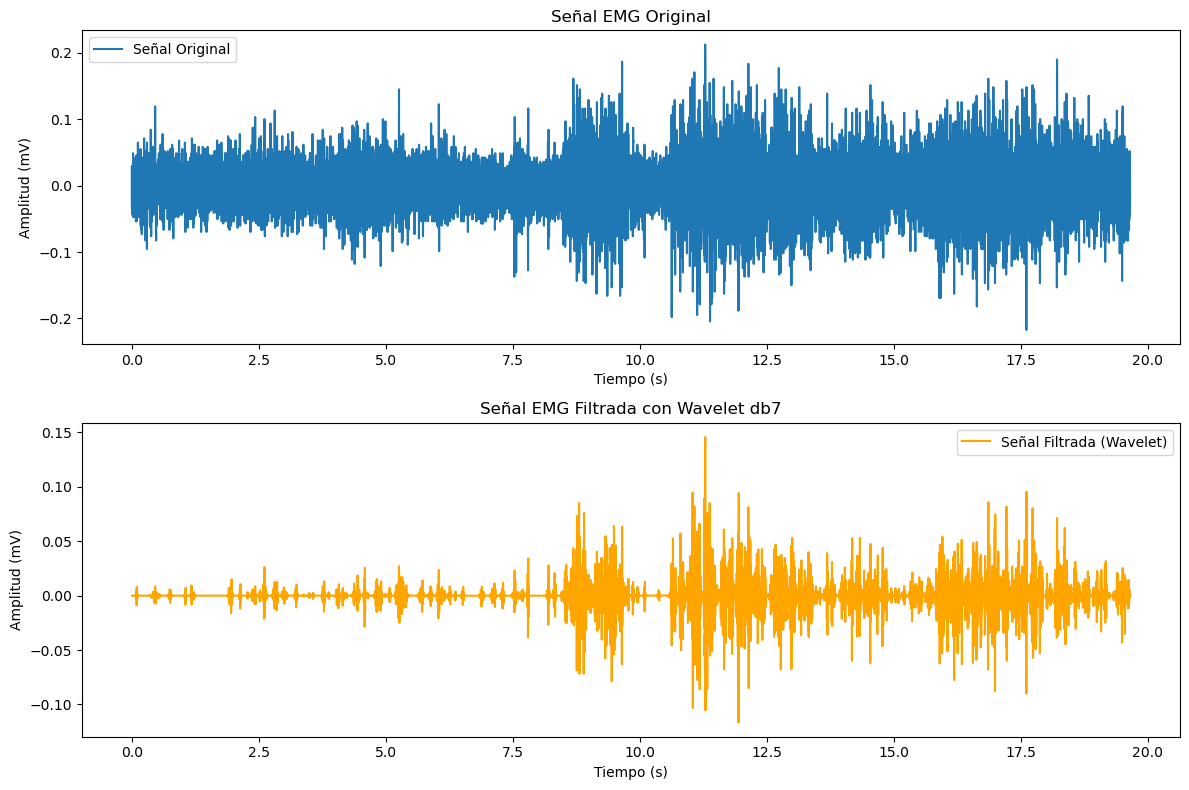

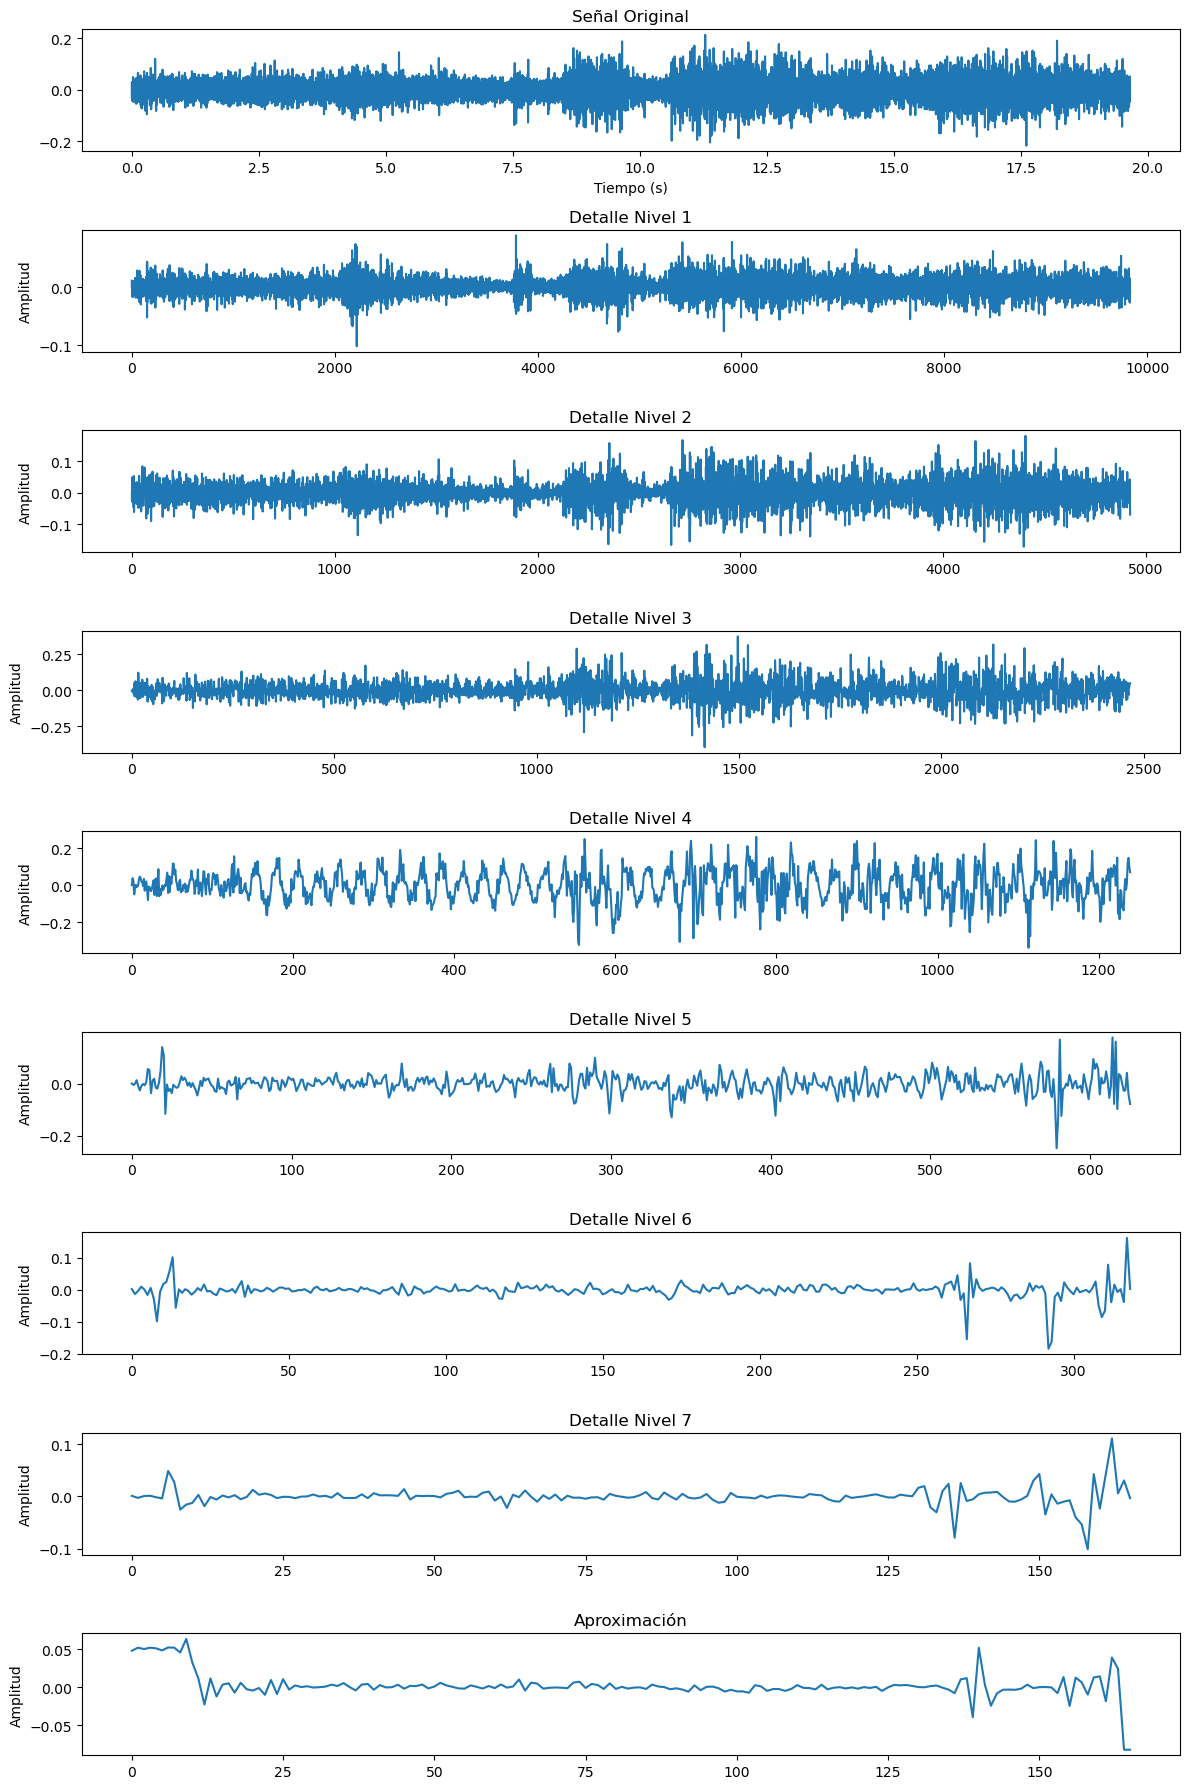

In [8]:
ruta_archivo = "C:/Users/DAVID/Desktop/INTRO A SEÑALES/lab 7/cara mov 1.txt"

# Leo el archivo y extraer la frecuencia de muestreo
with open(ruta_archivo, "r") as f:
    lineas = f.readlines()
    raw_data = lineas[1]
    x = re.findall(r"[0-9]{3,4}", raw_data)[0]
    Fs = float(x)
    Ts = 1/Fs

print(f"Frecuencia de muestreo: {Fs} Hz")

# Leer los datos, saltando las primeras 3 filas
datos = np.genfromtxt(ruta_archivo, delimiter="\t", skip_header=3)

y = datos[:, -2]
bits = 10
volt_range = 3.28  # mV
y = (y * volt_range/(2**bits - 1))  # convertir los bits a mV
y = y - np.mean(y)  # centrar la señal

t = np.arange(0, len(y)*Ts, Ts)

# 1. Descomposición Wavelet Daubechies
wavelet = 'db7' 
niveles = 7      

# Descomposición
coeffs = pywt.wavedec(y, wavelet, level=niveles)

# 2. Filtrado
umbral = 0.1  
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstrucción de la señal filtrada
y_denoised = pywt.waverec(coeffs_umbral, wavelet)

# 3. Ploteo de resultados

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:len(y_denoised)], y_denoised, label='Señal Filtrada (Wavelet)', color='orange')
plt.title(f'Señal EMG Filtrada con Wavelet {wavelet}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()
plt.tight_layout()
plt.show()

# 4. Ploteo de coeficientes de detalle y aproximación
plt.figure(figsize=(12, 2*(niveles+2)))
plt.subplot(niveles+2, 1, 1)
plt.plot(t, y)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')

for i in range(1, niveles+1):
    plt.subplot(niveles+2, 1, i+1)
    plt.plot(coeffs[niveles-i+1])
    plt.title(f'Detalle Nivel {i}')
    plt.ylabel('Amplitud')

plt.subplot(niveles+2, 1, niveles+2)
plt.plot(coeffs[0])
plt.title('Aproximación')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# N°2 : ECG
# Estado de Reposo

Umbral Ajustado aplicado: 0.0818


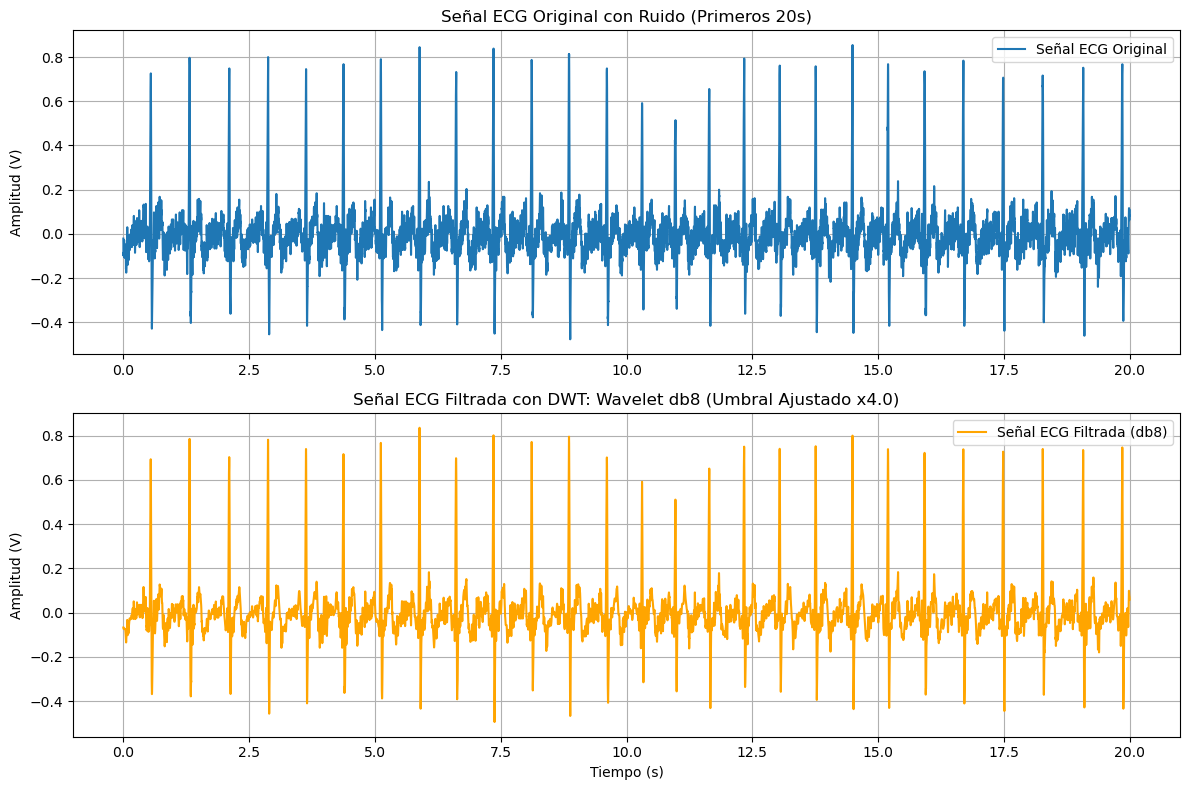

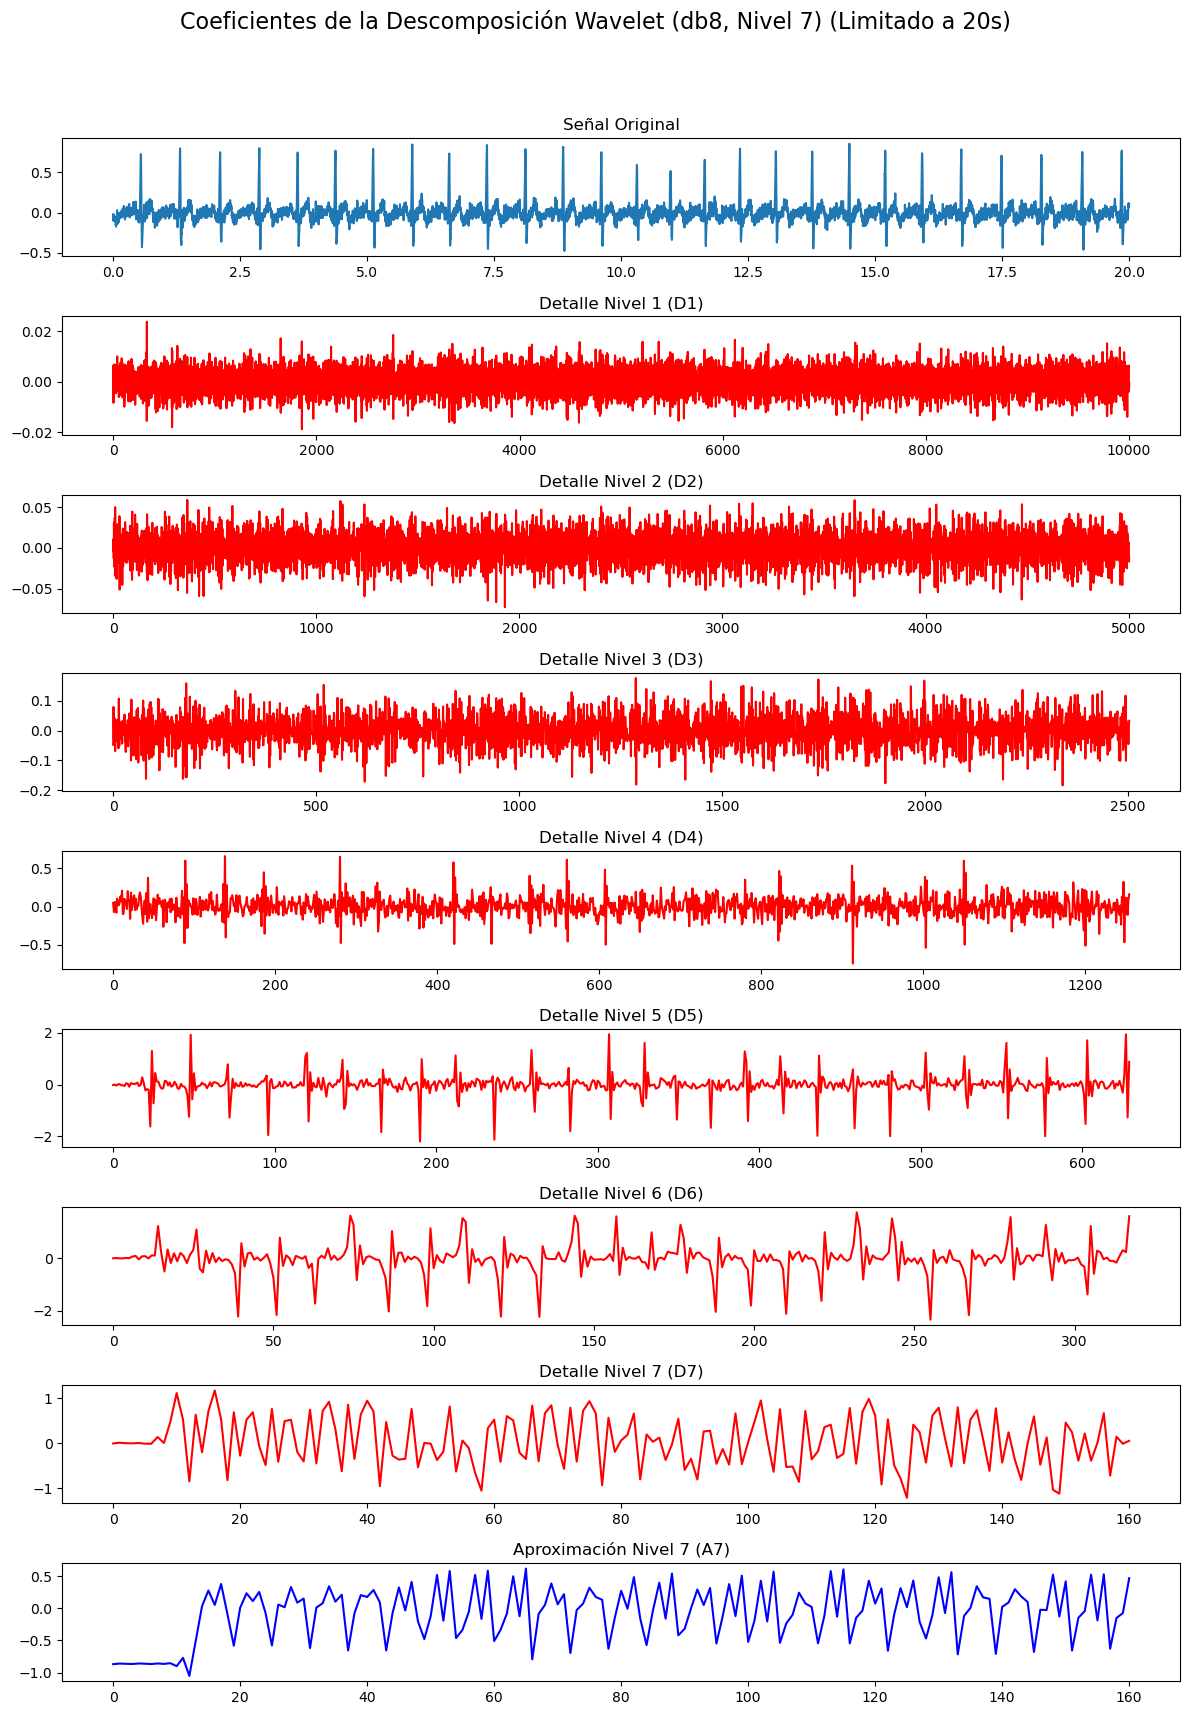

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import re

# RUTA DEL ARCHIVO
ruta_archivo = r"/Users/lucianatarazona/Documents/OpenSignals (r)evolution/files/lab4/Reposo.txt"

# --- PARÁMETROS CRÍTICOS ---
COLUMNA_DATOS = 5      # Índice 5 (Sexta columna, donde está el ECG)
TIEMPO_MUESTREO_S = 20 # Duración de la gráfica (20 segundos)
bits = 10
volt_range = 3.28 

# LECTURA DE DATOS Y FRECUENCIA DE MUESTREO (Fs)
try:
    with open(ruta_archivo, "r") as f:
        lineas = f.readlines()
        raw_data = lineas[1]
        Fs = float(re.findall(r"[0-9]{3,4}", raw_data)[0])
        Ts = 1/Fs
except Exception:
    Fs = 1000.0  
    Ts = 1/Fs
    
datos = np.genfromtxt(ruta_archivo, delimiter="\t", skip_header=3)
y = datos[:, COLUMNA_DATOS] 

# Conversión y Eliminación de DC Offset
y = (y * volt_range/(2**bits - 1))  
y = y - np.mean(y) 
t = np.arange(0, len(y)*Ts, Ts)

# DESCOMPOSICIÓN WAVELET (Db8)
wavelet = 'db8'  
niveles = 7     
coeffs = pywt.wavedec(y, wavelet, level=niveles)

# FILTRADO
D1 = coeffs[-1] 
sigma_hat = np.median(np.abs(D1)) / 0.6745 
N = len(y)
umbral_universal = sigma_hat * np.sqrt(2 * np.log(N))

# Factor para eliminar el ruido EMG (Ajustado a 4.0)
FACTOR_AJUSTE = 4.0 
umbral_ajustado = umbral_universal * FACTOR_AJUSTE

print(f"Umbral Ajustado aplicado: {umbral_ajustado:.4f}")

NIVELES_A_FILTRAR = 4 
coeffs_filtrados = [coeffs[0]] 

for c in coeffs[1 : -NIVELES_A_FILTRAR]:
    coeffs_filtrados.append(c)

# D4, D3, D2, D1 (Ruido) -> Aplicar Umbral Suave y Ajustado
for c in coeffs[-NIVELES_A_FILTRAR :]:
    c_umbralizado = pywt.threshold(c, umbral_ajustado, mode='soft')
    coeffs_filtrados.append(c_umbralizado)

# Reconstrucción de la señal filtrada
y_denoised = pywt.waverec(coeffs_filtrados, wavelet)
t_reconstruido = t[:len(y_denoised)]


indice_corte = min(len(y), int(TIEMPO_MUESTREO_S * Fs))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t[:indice_corte], y[:indice_corte], label='Señal ECG Original')
plt.title(f'Señal ECG Original con Ruido (Primeros {TIEMPO_MUESTREO_S}s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_reconstruido[:indice_corte], y_denoised[:indice_corte], label=f'Señal ECG Filtrada ({wavelet})', color='orange')
plt.title(f'Señal ECG Filtrada con DWT: Wavelet {wavelet} (Umbral Ajustado x{FACTOR_AJUSTE})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 2*(niveles+2)))
plt.suptitle(f'Coeficientes de la Descomposición Wavelet ({wavelet}, Nivel {niveles}) (Limitado a 20s)', fontsize=16)

# 1. Señal Original
plt.subplot(niveles+2, 1, 1)
plt.plot(t[:indice_corte], y[:indice_corte])
plt.title('Señal Original')

# 2. Coeficientes de Detalle (D1, D2, ..., D7)
detalles = coeffs[1:] 
detalles_ordenados = detalles[::-1] 
niveles_ordenados = list(range(1, niveles + 1)) 

for i, coeficiente in enumerate(detalles_ordenados):
    nivel_d = niveles_ordenados[i]
    
    prop_corte = len(coeficiente) / len(y) 
    indice_coef_corte = int(indice_corte * prop_corte)
    indice_coef_corte = max(1, indice_coef_corte) 

    plt.subplot(niveles+2, 1, i + 2)
    plt.plot(coeficiente[:indice_coef_corte], color='red')
    plt.title(f'Detalle Nivel {nivel_d} (D{nivel_d})')

# 3. Coeficiente de Aproximación (A7)
coeficiente_A = coeffs[0]
prop_corte_A = len(coeficiente_A) / len(y) 
indice_coef_corte_A = int(indice_corte * prop_corte_A)
indice_coef_corte_A = max(1, indice_coef_corte_A) 

plt.subplot(niveles+2, 1, niveles + 2)
plt.plot(coeficiente_A[:indice_coef_corte_A], color='blue')
plt.title(f'Aproximación Nivel {niveles} (A{niveles})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#  Estado Post-Actividad física

Umbral Ajustado aplicado: 0.0884


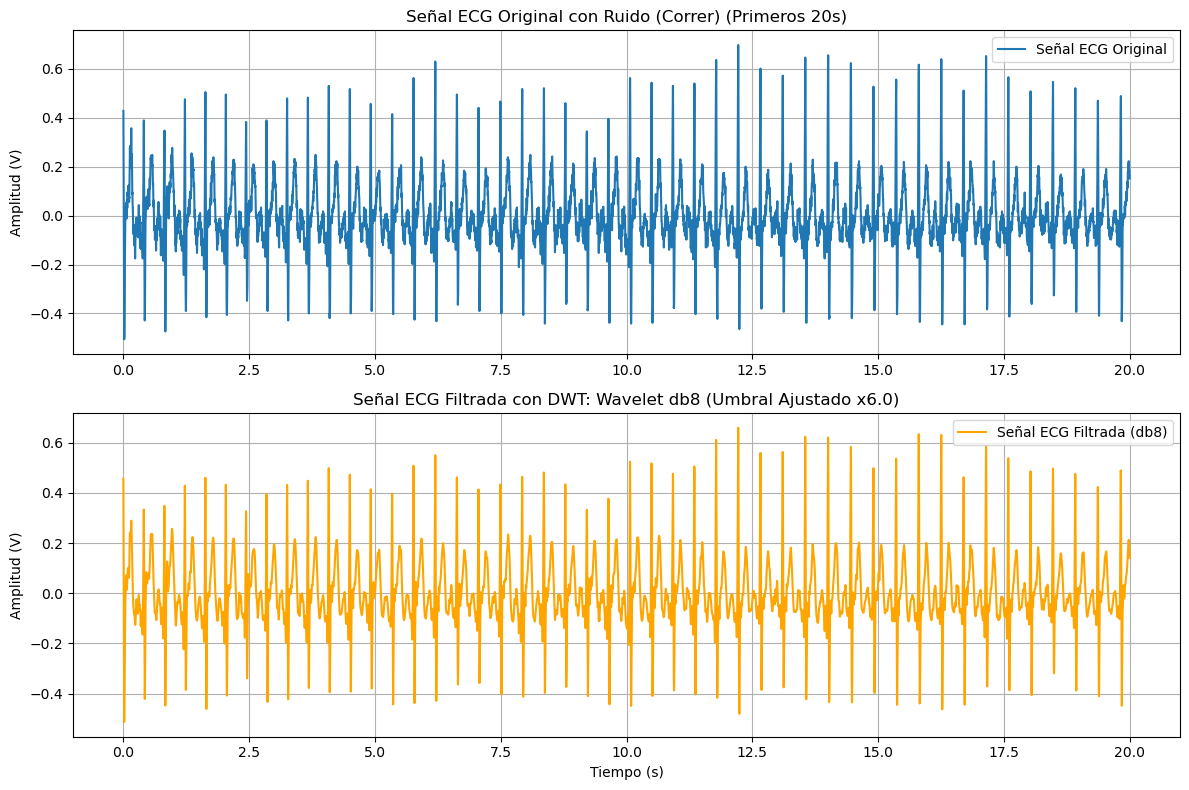

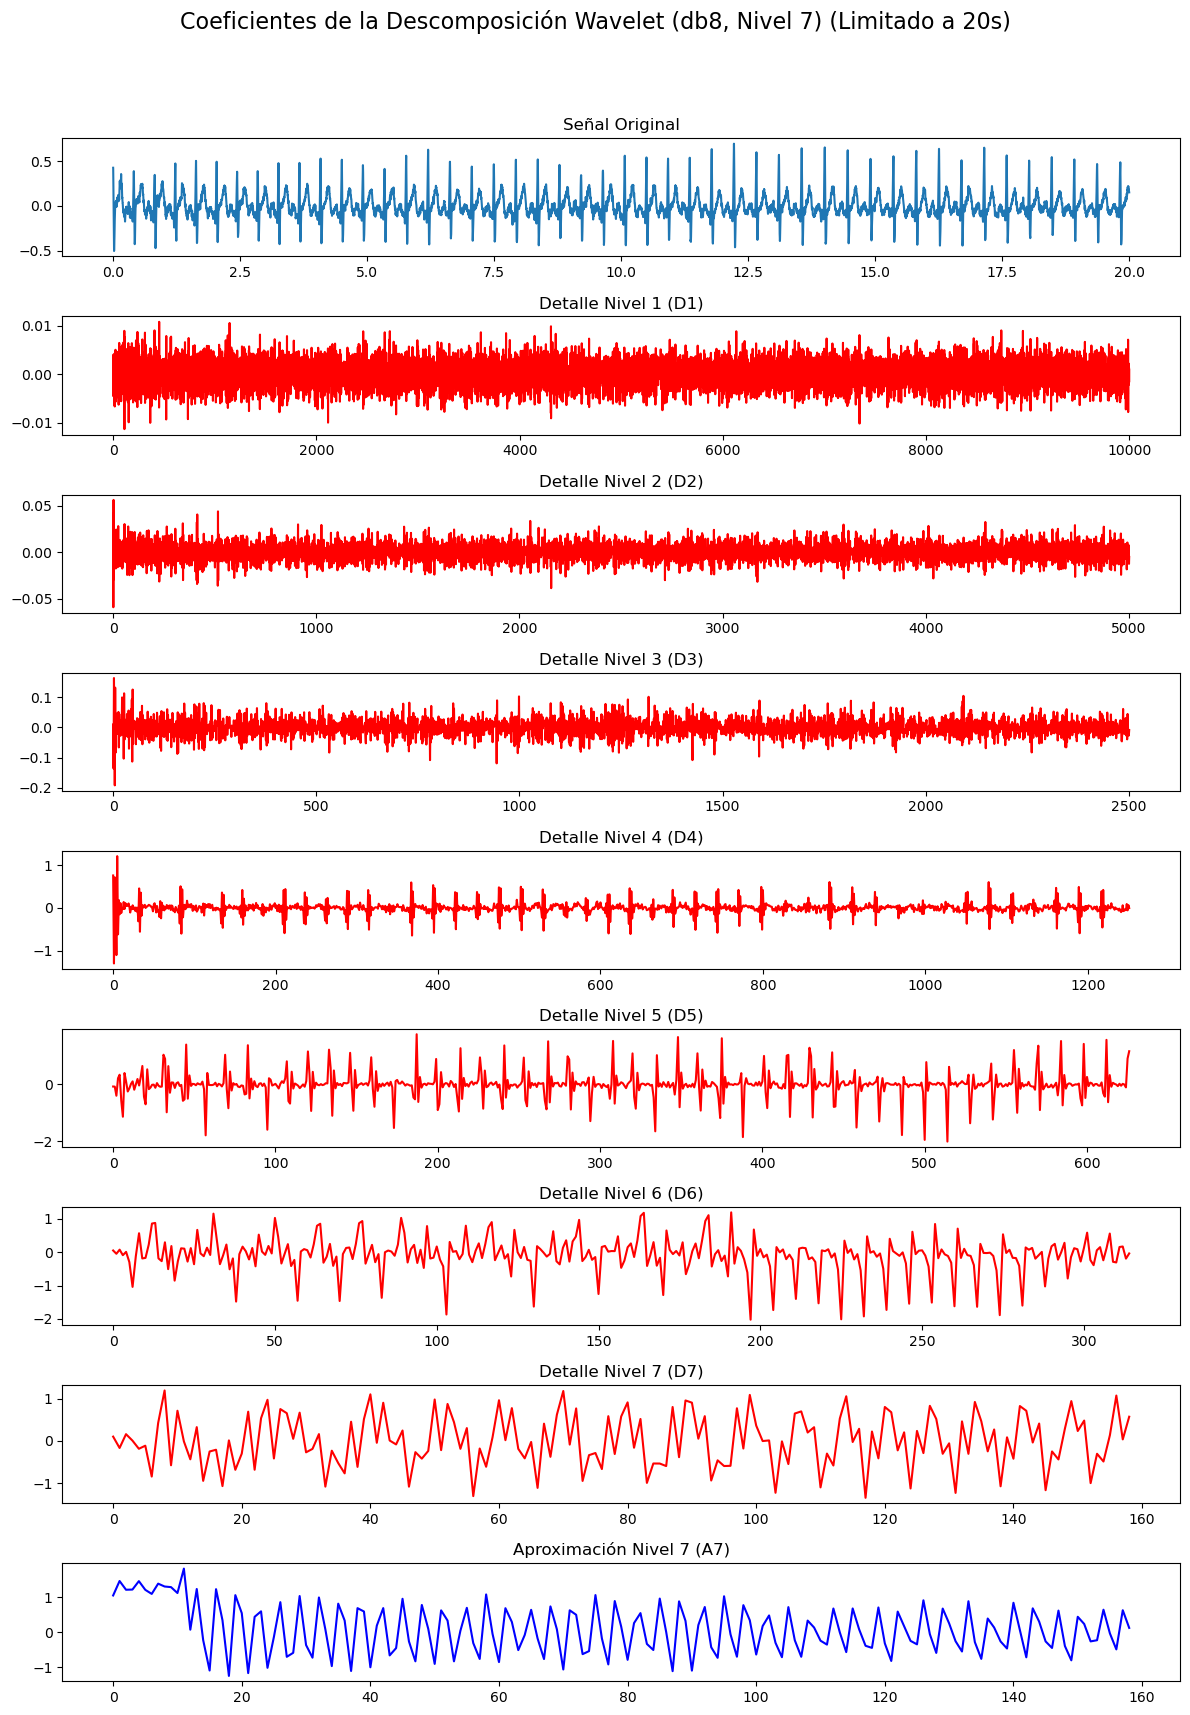

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import re

# RUTA DEL ARCHIVO
ruta_archivo = r"/Users/lucianatarazona/Documents/OpenSignals (r)evolution/files/lab4/correr.txt" 

# --- PARÁMETROS CRÍTICOS ---
COLUMNA_DATOS = 5      # Índice 5 (Sexta columna, donde está el ECG)
TIEMPO_MUESTREO_S = 20 # Duración de la gráfica
bits = 10
volt_range = 3.28 

# LECTURA DE DATOS Y FRECUENCIA DE MUESTREO (Fs)
try:
    with open(ruta_archivo, "r") as f:
        lineas = f.readlines()
        raw_data = lineas[1]
        Fs = float(re.findall(r"[0-9]{3,4}", raw_data)[0])
        Ts = 1/Fs
except Exception:
    Fs = 1000.0  
    Ts = 1/Fs
    
datos = np.genfromtxt(ruta_archivo, delimiter="\t", skip_header=3)
y = datos[:, COLUMNA_DATOS] 

# Conversión y Eliminación de DC Offset
y = (y * volt_range/(2**bits - 1))  
y = y - np.mean(y) 
t = np.arange(0, len(y)*Ts, Ts)

# DESCOMPOSICIÓN WAVELET (Db8)
wavelet = 'db8'  
niveles = 7     
coeffs = pywt.wavedec(y, wavelet, level=niveles)

# FILTRADO
D1 = coeffs[-1] 
sigma_hat = np.median(np.abs(D1)) / 0.6745 
N = len(y)
umbral_universal = sigma_hat * np.sqrt(2 * np.log(N))

# Factor para eliminar el ruido EMG: 6.0 para actividad física
FACTOR_AJUSTE = 6.0 
umbral_ajustado = umbral_universal * FACTOR_AJUSTE

print(f"Umbral Ajustado aplicado: {umbral_ajustado:.4f}")

NIVELES_A_FILTRAR = 4 
coeffs_filtrados = [coeffs[0]] 

for c in coeffs[1 : -NIVELES_A_FILTRAR]:
    coeffs_filtrados.append(c)

for c in coeffs[-NIVELES_A_FILTRAR :]:
    c_umbralizado = pywt.threshold(c, umbral_ajustado, mode='soft')
    coeffs_filtrados.append(c_umbralizado)

# Reconstrucción de la señal filtrada
y_denoised = pywt.waverec(coeffs_filtrados, wavelet)
t_reconstruido = t[:len(y_denoised)]


indice_corte = min(len(y), int(TIEMPO_MUESTREO_S * Fs))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t[:indice_corte], y[:indice_corte], label='Señal ECG Original')
plt.title(f'Señal ECG Original con Ruido (Correr) (Primeros {TIEMPO_MUESTREO_S}s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_reconstruido[:indice_corte], y_denoised[:indice_corte], label=f'Señal ECG Filtrada ({wavelet})', color='orange')
plt.title(f'Señal ECG Filtrada con DWT: Wavelet {wavelet} (Umbral Ajustado x{FACTOR_AJUSTE})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 2*(niveles+2)))
plt.suptitle(f'Coeficientes de la Descomposición Wavelet ({wavelet}, Nivel {niveles}) (Limitado a 20s)', fontsize=16)

# 1. Señal Original
plt.subplot(niveles+2, 1, 1)
plt.plot(t[:indice_corte], y[:indice_corte])
plt.title('Señal Original')

# 2. Coeficientes de Detalle (D1, D2, ..., D7)
detalles = coeffs[1:] 
detalles_ordenados = detalles[::-1] 
niveles_ordenados = list(range(1, niveles + 1)) 

for i, coeficiente in enumerate(detalles_ordenados):
    nivel_d = niveles_ordenados[i]
    
    prop_corte = len(coeficiente) / len(y) 
    indice_coef_corte = int(indice_corte * prop_corte)
    indice_coef_corte = max(1, indice_coef_corte) 

    plt.subplot(niveles+2, 1, i + 2)
    plt.plot(coeficiente[:indice_coef_corte], color='red')
    plt.title(f'Detalle Nivel {nivel_d} (D{nivel_d})')

# 3. Coeficiente de Aproximación (A7)
coeficiente_A = coeffs[0]
prop_corte_A = len(coeficiente_A) / len(y) 
indice_coef_corte_A = int(indice_corte * prop_corte_A)
indice_coef_corte_A = max(1, indice_coef_corte_A) 

plt.subplot(niveles+2, 1, niveles + 2)
plt.plot(coeficiente_A[:indice_coef_corte_A], color='blue')
plt.title(f'Aproximación Nivel {niveles} (A{niveles})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()